# Introduction to Support Vector Machine

In [42]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


### What is a Support Vector Machine (SVM)

SVM is a supervised machine learning algorithm that can be used
for classification, regression and outlier detection.

In this document we will only apply SVM only to classification problems.

### Examples of SVM use

Some of the real world uses of SVM are the following:

- Handwriting recognition
- Intrusion detection
- Face detection
- Email classification
- Gene classification


### Pros of using SVM
- Applicable to datasets containing multiple features.
- Effective even if the number of features is greater than the number of data points.
- Memory efficient ( compared to NN).
- Custom kernel functions are supported.
- Functions well where the data classes are well defined.
- It is more productive in high dimensional spaces. 


### Cons of using SVM

- If the number of features are a lot larger that the number of samples the overfitting is very possible.
- The output of the SVM does not contain a probability estimate.
- Some implementation complexity when custom kernels are needed.
- Not suitable for large datasets (the algorithm becomes very complex).
- Does not perform well when data is overlapping.


## Simple example of using SVM


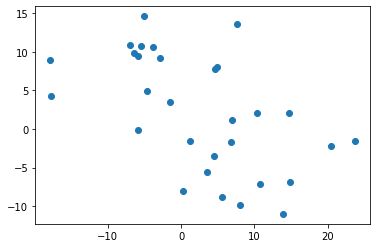

In [137]:
def make_clustered_data(n_clusters, n_samples, cluster_std=3):
    features, _ = make_blobs(
        n_samples = n_samples,
        n_features = 2, 
        centers = n_clusters,
        cluster_std = 5.8,
        shuffle = True
    )

    return pd.DataFrame(features, columns=["x", "y"])

df = make_clustered_data(2, 30)
plt.scatter(df["x"], df["y"])

In [119]:
def plot_line(*, a, b, c, d, color='black',  linewidth=3.1, linestyle='solid'):
    assert b != 0 and a != 0
    point1 = [0,  (d-c) / b]
    point2 = [(d-c)/a, 0]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, color=color, linewidth=linewidth, linestyle=linestyle)
    plt.grid(color='gray', linestyle='-', linewidth=0.2)
    plt.xlabel("x")
    plt.ylabel("y")

A straight line in the 2 dimentional plane can be represented by the following equation: 

$\Large ax + by + c=0$

To make things more concrete lets assume:

$\Large a=3, b=2, c = -2$

so our line becomes 

$\Large 3x + 2y - 2= 0$


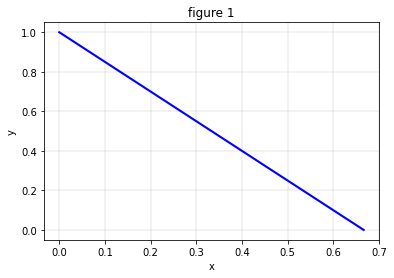

In [131]:
a, b, c = 3, 2, -2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
_ = plt.title("figure 1")

If we also plot the following lines:

$\Large 3x + 2y - 2 = -1$

$\Large 3x + 2y - 2 =  0$

our plot now becomes:


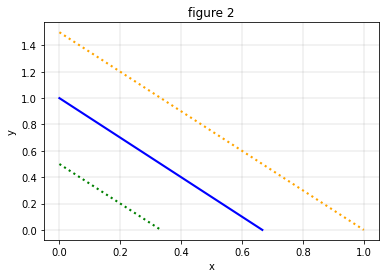

In [130]:
a, b, c = 3, 2, -2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = -1, color="green", linestyle='dotted', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = 1, color="orange", linestyle='dotted', linewidth=2.1 )
_ = plt.title("figure 2")

To summarize, the 3 lines that we are plotting above are the following:

$\Large 3x + 2y - 2= -1$

$\Large 3x + 2y - 2= 0$

$\Large 3x + 2y - 2= 1$

What will happen if I multiply OLNY the left part of these equations by the same number? 

For our example lets say that we multiply the left parts of the equations by the number 3 thus our equations now become:

$\Large 9x + 4y - 4= -1$

$\Large 9x + 4y - 4= 0$

$\Large 9x + 4y - 4= 1$

An if we plot them again the graphical represenation appears 
as follows:


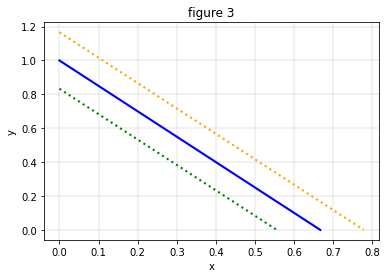

In [132]:
a, b, c = 3*3, 3*2, 3*-2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = -1, color="green", linestyle='dotted', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = 1, color="orange", linestyle='dotted', linewidth=2.1 )
_ = plt.title("figure 3")

Carefully insepecting the figure 3 we notice that although
the "blue" line (the one that is set to equals to 0) remains
in the same postion, the other two lines have now moved closer to it (while they are still parallel to it though).

It is easy to realize that as the factor we used to multiply the 
left side of the equations grow the closer the three lines are 
getting to each other ( and vice versa).



### Definition: Expanding rate

We define the "factor" we have used to multiply the left sides
of the above equations to be called as the **Expanding rate**